In [33]:
import numpy as np 
import pandas as pd 
import sys
from pandas import Series,DataFrame

from bqplot import pyplot as plt

import time
import urllib
import matplotlib.dates as mdates

import csv

from math import pi
from numpy import random
from numpy.random import randn

from io import StringIO
from matplotlib.pyplot import *
from scipy import stats
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')



%matplotlib inline

Load CSV file into memory

In [2]:
data = pd.read_csv("C:/Users/User/uber-data.csv")

In [5]:
data['Date/Time']
data.head()
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22,40.7640,-73.9744,B02764
564512,4/30/2014 23:26,40.7629,-73.9672,B02764
564513,4/30/2014 23:31,40.7443,-73.9889,B02764
564514,4/30/2014 23:32,40.6756,-73.9405,B02764
564515,4/30/2014 23:48,40.6880,-73.9608,B02764


In [6]:
dt = '4/30/2014 23:22:00'
d,t = dt.split(' ')


print(d)
print(t)

4/30/2014
23:22:00


In [7]:
dt = pd.to_datetime(dt)

In [8]:
dt.weekday_name

'Wednesday'

In [8]:
dt.week

18

In [11]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [12]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [28]:
def get_weekday(dt):
    return dt.weekday

data['Weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)

data.head()

,Date/Time,Lat,Lon,Base,dom,Weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,<built-in method weekday of Timestamp object a...,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,<built-in method weekday of Timestamp object a...,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,<built-in method weekday of Timestamp object a...,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,<built-in method weekday of Timestamp object a...,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,<built-in method weekday of Timestamp object a...,0


Text(0.5,1,'Frequency by DoM-Uber')

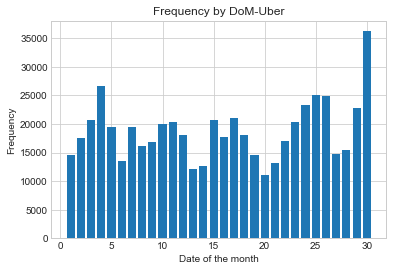

In [14]:
hist(data.dom , bins = 30 , rwidth = .8 , range = (0.5 , 30.5))

xlabel('Date of the month')
ylabel('Frequency')
title("Frequency by DoM-Uber")

In [15]:
for k , rows in data.groupby('dom'):
    #print((k,rows))
    #break
    
    
     print((k , len(rows)))

(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [16]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

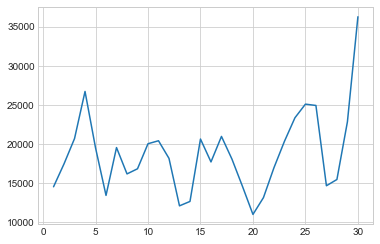

In [17]:
plot(by_date)

<Container object of 30 artists>

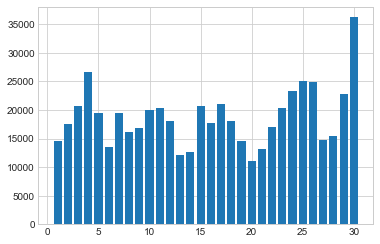

In [18]:
bar(range(1 , 31) , by_date)

In [19]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

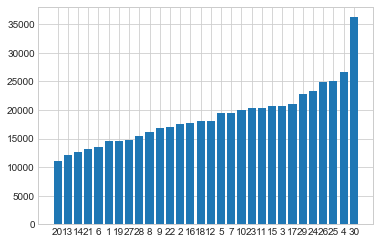

In [20]:
bar(range(1 , 31) , by_date_sorted)
xticks(range(1,31) , by_date_sorted.index)
;

(array([  7769.,   4935.,   5040.,   6095.,   9476.,  18498.,  24924.,
         22843.,  17939.,  17865.,  18774.,  19425.,  22603.,  27190.,
         35324.,  42003.,  45475.,  43003.,  38923.,  36244.,  36964.,
         30645.,  20649.,      0.]),
 array([  0.5       ,   1.47916667,   2.45833333,   3.4375    ,
          4.41666667,   5.39583333,   6.375     ,   7.35416667,
          8.33333333,   9.3125    ,  10.29166667,  11.27083333,
         12.25      ,  13.22916667,  14.20833333,  15.1875    ,
         16.16666667,  17.14583333,  18.125     ,  19.10416667,
         20.08333333,  21.0625    ,  22.04166667,  23.02083333,  24.        ]),
 <a list of 24 Patch objects>)

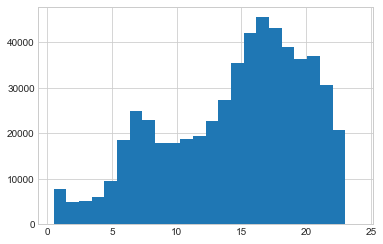

In [23]:
hist(data.hour , bins = 24 , range =(.5 , 24))

In [ ]:
hist(data.weekday , bins = 7 , range = (.5 , 7) ,rwidth = .8 , color = 'green')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

In [26]:
count_rows(data)

564516

In [ ]:
data.groupby('hour weekday'.split()).apply(count_rows).unstack()

In [ ]:
seaborn.heatmap(data)

''

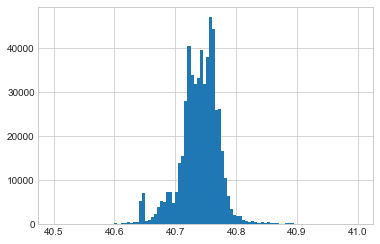

In [38]:
hist(data['Lat'] , bins = 100 , range = (40.5 , 41))
;

''

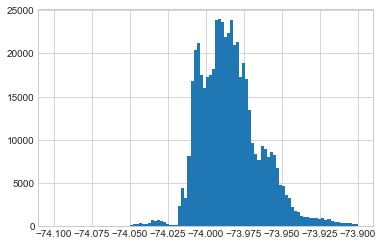

In [41]:
hist(data['Lon'] , bins = 100 , range = (-74.1 , -73.9))
;

''

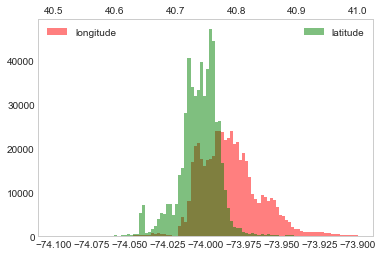

In [47]:
hist(data['Lon'] , bins = 100 , range = (-74.1 , -73.9) , color = 'r' , alpha = .5 , label = 'longitude')
grid()
legend(loc = 'upper left')
twiny()
hist(data['Lat'] , bins = 100 , range = (40.5 , 41) , color = 'g' , alpha = .5 , label = 'latitude')
grid()
legend(loc = 'upper right')
;

(0, 100)

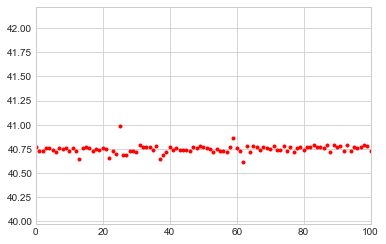

In [49]:
plot(data['Lat'] , '.' , color = 'red')
xlim(0,100)